In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
amzn = yf.download('AMZN', start='2018-01-01', end='2023-12-31')
amzn.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2018-01-02,59.450500,59.500000,58.525501,58.599998,53890000
2018-01-03,60.209999,60.274502,59.415001,59.415001,62176000
2018-01-04,60.479500,60.793499,60.233002,60.250000,60442000
2018-01-05,61.457001,61.457001,60.500000,60.875500,70894000
2018-01-08,62.343498,62.653999,61.601501,61.799999,85590000


In [3]:
amzn['Return'] = amzn['Close'].pct_change()

amzn['LogReturn'] = np.log(amzn['Close'] / amzn['Close'].shift(1))

amzn['MA20'] = amzn['Close'].rolling(window=20).mean()

amzn['Volatility20'] = amzn['LogReturn'].rolling(window=20).std()


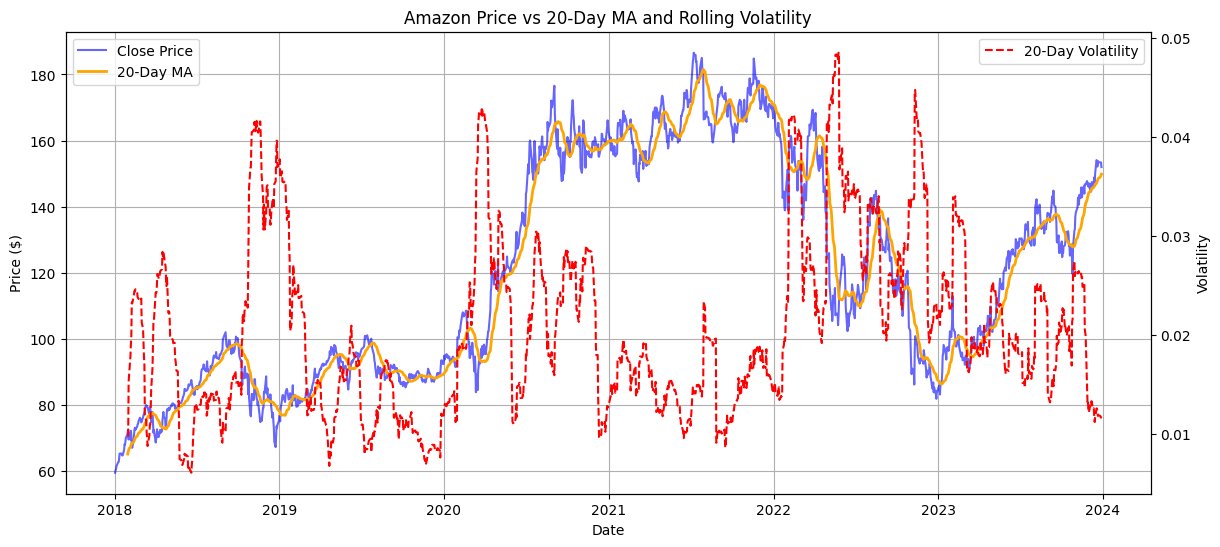

In [4]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_title('Amazon Price vs 20-Day MA and Rolling Volatility')
ax1.plot(amzn['Close'], label='Close Price', color='blue', alpha=0.6)
ax1.plot(amzn['MA20'], label='20-Day MA', color='orange', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(amzn['Volatility20'], label='20-Day Volatility', color='red', linestyle='--')
ax2.set_ylabel('Volatility')
ax2.legend(loc='upper right')

plt.show()
